# Pneumonia Classification in Chest X-rays: Data Exploration

In this notebook, the initial exploration of the Chest X-Ray dataset is performed. This stage is fundamental to understanding the nature of the data before training any deep learning model.

The workflow includes:
1.  **Environment Configuration:** Setting up the necessary libraries.
2.  **Transformation Definition:** Establishing preprocessing and augmentation pipelines.
3.  **Data Loading:** Mapping the directory structure to PyTorch datasets.
4.  **Visual Inspection:** Qualitatively assessing the radiological differences between classes.
5.  **Statistical Analysis:** Quantifying class distribution to identify potential imbalances.



![Chest X-ray examples: Normal vs Pneumonia](../results/figures/neumonia-normal.png)



### 1. Environment Setup and Data Configuration
The necessary libraries for image processing and data management are imported. torch and torchvision form the backbone of the deep learning pipeline, while numpy and matplotlib are utilized for numerical operations and visualization, respectively. A standard image size is established here to ensure consistency across the preprocessing stages.

In [15]:

# Core deep learning libraries
import torch
import torchvision

# Data handling
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Numerical and visualization
import numpy as np
import matplotlib.pyplot as plt

# System
import os

# componer esto:
from collections import Counter

### 2. Image Transformations and Augmentation
To enhance the model's ability to generalize, a set of transformations was defined. For the training set, Data Augmentation techniques such as random rotation and horizontal flipping were implemented. Both datasets were normalized to a range of [−1,1] to stabilize the training process.
- We use a image size = 224
- A random ratation = 10 (un poco mas conservadora)

In [16]:
# Update data augmentation like dataloaders.py

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

### 3. Dataset Loading and Class Identification
The images are loaded using the datasets.ImageFolder structure, which automatically assigns labels based on the subdirectory names (NORMAL and PNEUMONIA). The dataset is split into training and testing subsets according to the directory structure.



The target classes are extracted to confirm the label mapping, ensuring that the model output corresponds correctly to the clinical diagnosis.

In [17]:
Data_dir = "../data/chest_xray"

train_dataset = datasets.ImageFolder(
    root=os.path.join(Data_dir, "train"),
    transform=train_transforms
)

test_dataset = datasets.ImageFolder(
    root=os.path.join(Data_dir, "test"),
    transform=test_transforms
)

class_names = train_dataset.classes
print("Clases:", class_names)


Clases: ['NORMAL', 'PNEUMONIA']


### 4. Data Loader Initialization
DataLoader instances are created to manage batching and shuffling.
* **Training Loader:** Shuffling is enabled (shuffle=True) to ensure the model does not learn order-dependent patterns.
* **Test Loader:** Shuffling is disabled (shuffle=False) to maintain a consistent evaluation order.
A batch size of 32 is selected as a balance between memory usage and training stability.

In [18]:
Batch_size = 32

train_loader = DataLoader(
    train_dataset,
    batch_size=Batch_size,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=Batch_size,
    shuffle=False
)

### 5. Visual Data Inspection
A visualization function, show_images, is implemented to display random samples from each category. This step allows for a qualitative assessment of the dataset quality and highlights the radiological differences between **NORMAL** (clear lungs) and **PNEUMONIA** (areas of opacity or consolidation).



The images are denormalized prior to display to restore their original visual appearance.

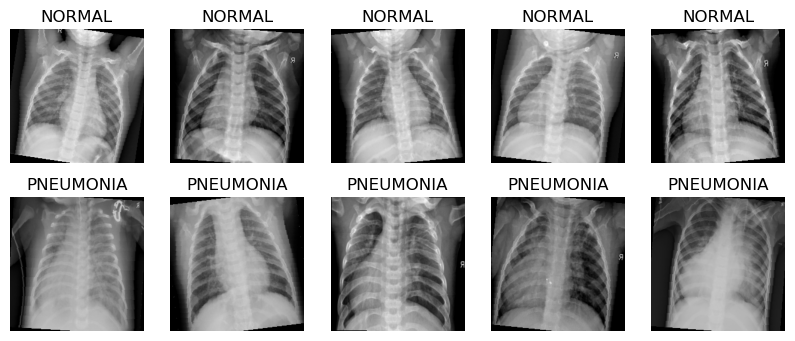

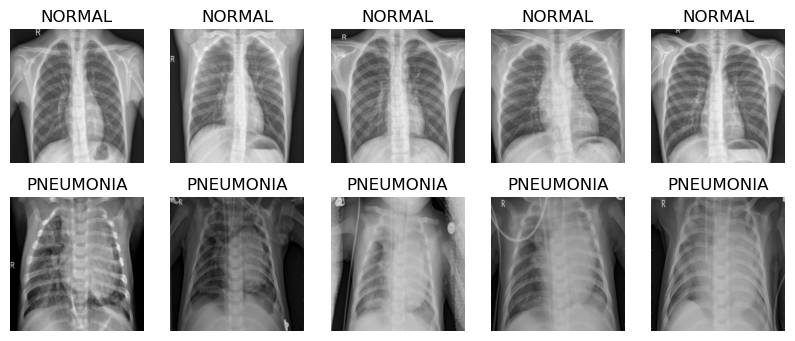

In [19]:
def show_images(dataset, class_names, n_per_class=5):
    plt.figure(figsize=(10, 4))
    idx = 0
    
    for class_idx, class_name in enumerate(class_names):
        count = 0
        i = 0
        while count < n_per_class:
            image, label = dataset[i]
            if label == class_idx:
                plt.subplot(len(class_names), n_per_class, idx + 1)
                
                # Desnormalizar
                img = image.permute(1, 2, 0)
                img = img * 0.5 + 0.5
                
                plt.imshow(img)
                plt.title(class_name)
                plt.axis("off")
                
                idx += 1
                count += 1
            i += 1
    
    plt.show()



show_images(train_dataset, class_names, n_per_class=5)
show_images(test_dataset, class_names, n_per_class=5)


### 6. Statistical Analysis of Class Distribution
The following code block performs a quantitative analysis of the dataset. The number of samples per class is calculated to detect data imbalance. Understanding this distribution is critical for selecting the appropriate loss function (e.g., Weighted Cross Entropy) and evaluation metrics (e.g., F1-Score vs. Accuracy).



**Output Information:**
* **Counts:** The absolute number of images for NORMAL (0) and PNEUMONIA (1) cases.
* **Total:** The overall size of the training and testing sets.

In [20]:
print("\n" + "="*50)
print("Data Information")
print("="*50)


print("Total train:", len(train_dataset))
train_counts = Counter(train_dataset.targets)
print("Train:", train_counts)
print("="*50)
print("Total test:", len(test_dataset))
test_counts = Counter(test_dataset.targets)
print("Test:", test_counts)
print("="*50)


Data Information
Total train: 5216
Train: Counter({1: 3875, 0: 1341})
Total test: 624
Test: Counter({1: 390, 0: 234})
